In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0

/Users/seein/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seein/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seein/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seein/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

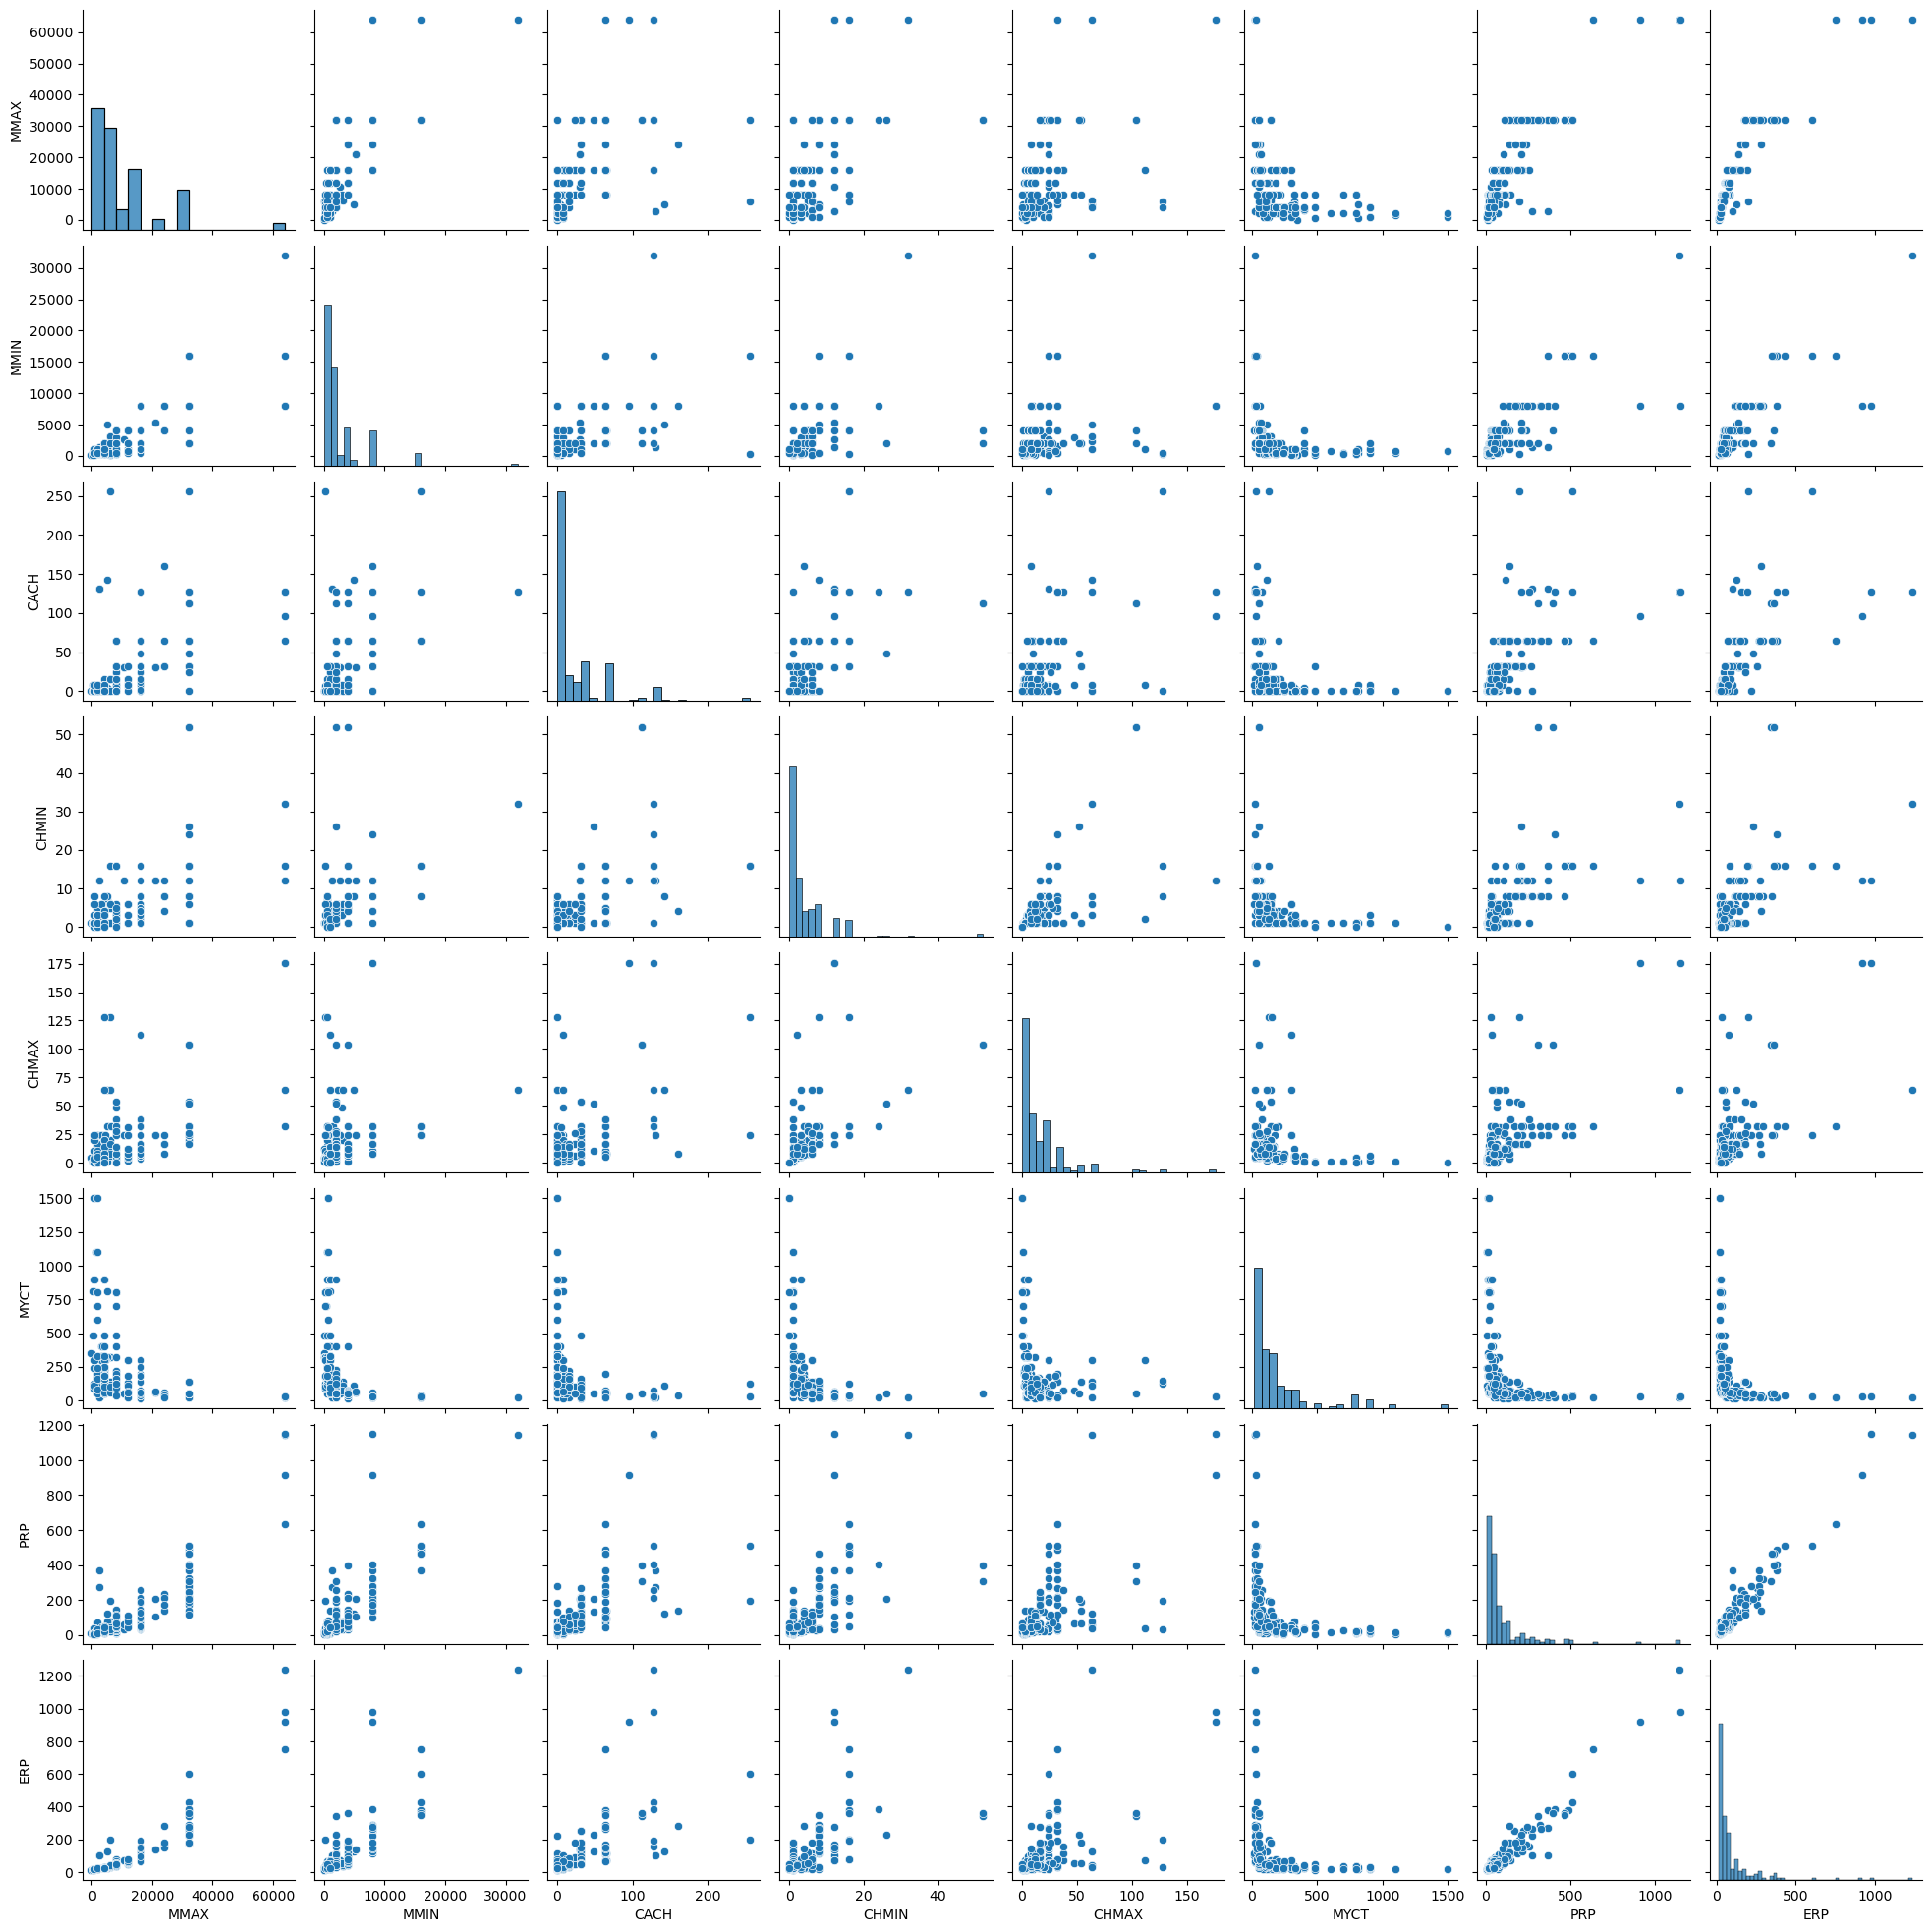

In [2]:
# 데이터 탐색 및 시각화 (데이터셋 업데이트)
machine_data = pd.read_csv('machine.data_update.csv')

print(machine_data.info())
print(machine_data.describe())
print(machine_data.head())
print(machine_data.shape)

# 범주형 데이터 수치화
dum = pd.get_dummies(machine_data.VendorName, prefix='v', dtype=float)
machine_data = pd.concat([machine_data.drop('VendorName', axis=1), dum], axis =1)
dum = pd.get_dummies(machine_data['ModelName'], prefix='m',  dtype=float)
machine_data = pd.concat([machine_data.drop('ModelName', axis=1), dum], axis =1)

# 데이터분포 시각화
result = machine_data.corr()['PRP']
result = np.abs(result).sort_values(ascending=False)
print(result)
features = ['MMAX', 'MMIN', 'CACH', 'CHMIN', 'CHMAX', 'MYCT', 'PRP', 'ERP']
sns.pairplot(machine_data[features])
plt.show()


In [3]:
# X, y 설정 (features 선택)
num_features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP']
X = machine_data[num_features]
y = machine_data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape

((167, 7), (167,))

In [4]:
# LinearRegression모델 설정
model = LinearRegression()

# 훈련 데이터 학습
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [5]:
# 교차 검증

cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
cv_mse_train = -cv_scores.mean()
cv_scores = cross_val_score(model,X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
cv_mae_train = -cv_scores.mean()
cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'r2')
cv_r2_train = cv_scores.mean()
print(f'<교차 검증>\nCorss-Validation MSE : {cv_mse_train}\nCorss-Validation MAE : {cv_mae_train}\nCorss-Validation r2 : {cv_r2_train}')


<교차 검증>
Corss-Validation MSE : 2611.43576683949
Corss-Validation MAE : 27.519659384521855
Corss-Validation r2 : 0.8479914615575093


/Users/seein/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


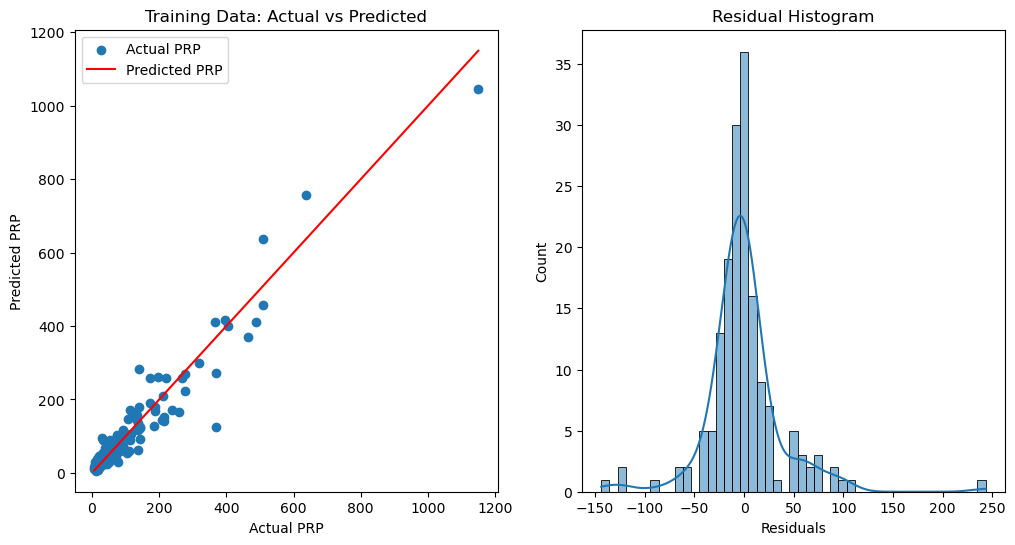

In [6]:
# 실제 데이터와 예측 데이터 비교 (학습 데이터)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, label='Actual PRP')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', label='Predicted PRP')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Training Data: Actual vs Predicted')
plt.legend()


residuals = y_train - y_train_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residual Histogram')
plt.show()

/Users/seein/miniconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


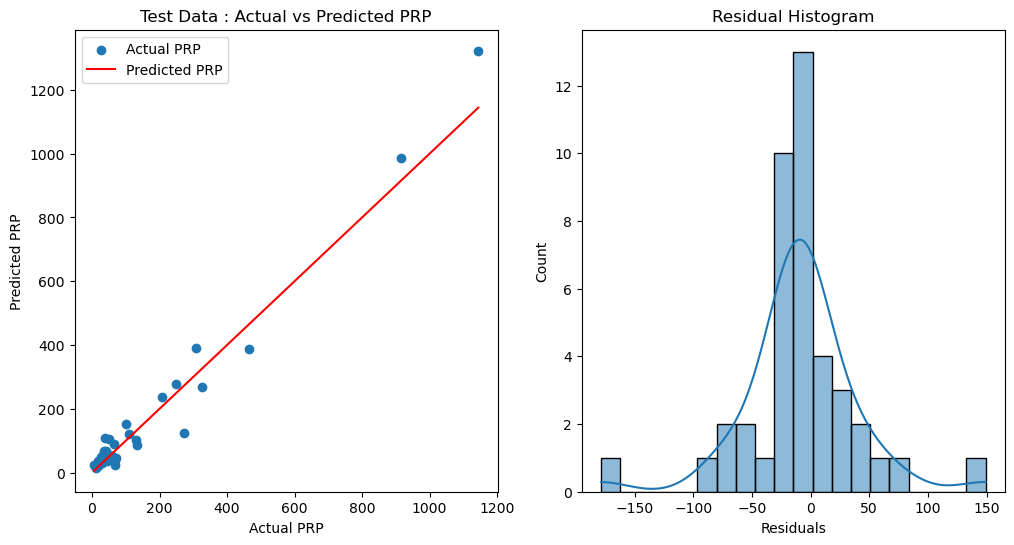

In [7]:
# 실제 데이터와 예측 데이터 비교 (테스트 데이터)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, label='Actual PRP')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Predicted PRP')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Test Data : Actual vs Predicted PRP')
plt.legend()

residuals = y_test - y_test_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residual Histogram')
plt.show()

In [8]:
# 모델 성능 테스트 (학습 데이터)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'<훈련 데이터 성능>\nMSE = {mse_train}\nMAE = {mae_train}\nR2 = {r2_train}')

# 모델 성능 테스트 (테스트 데이터)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'<테스트 데이터 성능>\nMSE = {mse_test}\nMAE = {mae_test}\nR2 = {r2_test}')

<훈련 데이터 성능>
MSE = 1529.0204705512963
MAE = 23.232255784639314
R2 = 0.9204648044109383
<테스트 데이터 성능>
MSE = 2370.0963747758374
MAE = 31.406218675535623
R2 = 0.9534424890368542
